In [1]:
def nn():
    # 训练函数
    def train():
        return 'train在这里'
    # 查询函数
    def query():
        return 'query在这里'
    nn.train=train
    nn.query=query

# 此时可以用下面代码测试这个啥也干不了的框架
nn()
nn.train()

'train在这里'

In [5]:
# 这里引入了一个重要的库
import numpy
# 定义权重矩阵--------------
# 拿到一个随机矩阵
a=numpy.random.rand(3,3)
a
# 此时运行一下, 可以看到a

array([[0.77420402, 0.40316125, 0.3791112 ],
       [0.02357232, 0.09072678, 0.92460338],
       [0.79879172, 0.22146857, 0.96530684]])

In [6]:
# 减0.5再看看
a=a-0.5
a

array([[ 0.27420402, -0.09683875, -0.1208888 ],
       [-0.47642768, -0.40927322,  0.42460338],
       [ 0.29879172, -0.27853143,  0.46530684]])

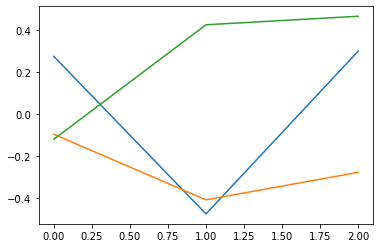

In [7]:
# 这里引入另一个重要的库, 这个库用来绘图
import matplotlib.pyplot as plt
# 可视化看看
plt.plot(a)

In [9]:
# a部分, 
inputnode=3 # 输入层网络节点数量
hiddenode=4 # 隐藏层节点数量
outputnode=5 # 输出层节点数量
nn.inputnode=inputnode # 输入层网络节点数量
nn.hiddenode=hiddenode # 隐藏层节点数量
nn.outputnode=outputnode # 输出层节点数量
# b部分,
# nn.ih定义从输入层到到隐藏层的系数矩阵
# 因为原始的随机数0-1, 用减法调整值域为-0.5到到+0.5
nn.ih = numpy.random.rand(nn.hiddenode,nn.inputnode)-0.5
nn.ho = numpy.random.rand(nn.outputnode,nn.hiddenode)-0.5

# b部分可选项: 
# 正态分布初始化, 简单的说就是让随机性更符合现实的统计规律, 正态的函数是numpy.random.normal(0.0,a, (b,c)), a使用pow(nn.hiddenode, -0.5)是分布数, b,c使用了矩阵维数
nn.ih = numpy.random.normal(0.0, pow(nn.hiddenode, -0.5),(nn.hiddenode, nn.inputnode))
nn.ho = numpy.random.normal(0.0, pow(nn.outputnode, -0.5),(nn.outputnode, nn.hiddenode))
# ------矩阵参数设置大功告成------
# 运行一下这个格子, 运行前可以在最后添加一行代码: nn.xx, 看一下刚刚设置的参数, 例如
nn.ih

array([[ 0.30854414,  0.14875194,  0.21339803],
       [ 0.42781208,  0.03647884, -0.5559867 ],
       [ 0.39932072, -0.45076019, -0.29920834],
       [ 0.95266543,  0.69895958, -0.30948349]])

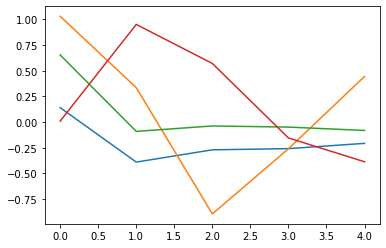

In [10]:
# 还可以可视化一下
# 可视化看看
plt.plot(nn.ho)

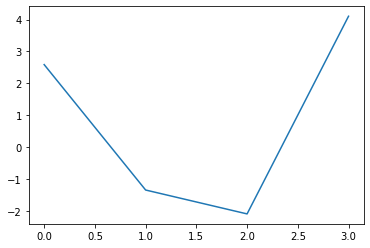

In [14]:
# 矩阵乘法如此简单(矩阵1乘矩阵2), numpy.dot(矩阵一, 矩阵二)
inp= [3,4,5]
hli=numpy.dot(nn.ih, inp)   
plt.plot(hli) # 运行一下看看结果

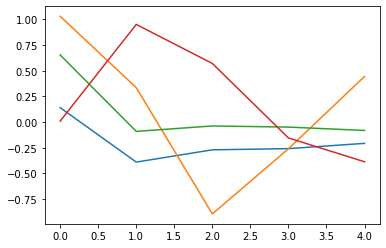

In [15]:
# ====== 第四部分(完) 启动函数
# 导入最后一个重要的库, 科学计算库, 我们准备导入sigma函数
import scipy.special as ss
# 此时, 我们定义启动函数 activation function 就是节点运算的函数
# 启动函数根据需要可以使用不同的各种函数, 此处使用的是s函数(也叫sigma函数), 就是平滑跃迁函数, 详情可以自行看: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
nn.active_f=lambda x: ss.expit(x)
# 这里lambda是一种快捷函数定义, 它很简便优雅, 但是, 只能定义一行函数, 冒号前面是参数, 后面是返回值, 这玩意有lisp内味了.

hlo = nn.active_f(hli) # 这里用启动函数处理了第三部得到的系数矩阵
plt.plot(nn.ho) # 打印一个看看

In [16]:
# 主函数
import numpy
import scipy.special
# 这里是主函数的定义, 定义为参数方式, 使用起来更方便
def nn(inputnode, hiddenode, outputnode, learnrate):
    # 定义参数, 网络分为三层, 这里定义每层的节点数--------------
    nn.inputnode=inputnode # 输入层网络节点数量
    nn.hiddenode=hiddenode # 隐藏层节点数量
    nn.outputnode=outputnode # 输出层节点数量
    # 正态分布初始化
    nn.ih = numpy.random.normal(0.0, pow(nn.hiddenode, -0.5),(nn.hiddenode, nn.inputnode))
    nn.ho = numpy.random.normal(0.0, pow(nn.outputnode, -0.5),(nn.outputnode, nn.hiddenode))
    # 启动函数 activation function 就是节点运算的函数
    nn.active_f=lambda x: scipy.special.expit(x)
    nn.learnrate=learnrate # 这个比率是学习的速率
    # 查询函数, 参数是一个list(数组)
    # 未来调用: query([1.0,0.5,-1.5])
    def query(inpl): # inpl是输入向量
        # ----------这里是我偷偷插入的一行, 没什么可讲的, 就是把一维数组(向量), 整理成为二维矩阵
        inp=numpy.array(inpl, ndmin=2).T
        # 矩阵乘法如此简单
        hli=numpy.dot(nn.ih, inp)   # hidden level input
        hlo = nn.active_f(hli) # hidden level output 隐藏层输出等于用s函数处理一下输入
        # 输出层, 一毛一样
        oli=numpy.dot(nn.ho, hlo)
        olo = nn.active_f(oli)
        return olo
    nn.query=query
    # 此句保证可以这样调用: nn.query([1.0,0.5,-1.5])

In [20]:
nn(3,5,2,0.5)
nn.query([1.0,0.5,-1.5])


array([[0.63270502],
       [0.79419587]])

In [21]:
# 还可以尝试一下下这一句:
query([1.0,0.5,-1.5]) # 这个可能报错(报错是正确结果), 如果没报错, 参见下面的解释
# 这个结果可能让伙伴们大吃一惊, 难道python没有闭包吗?. 难道函数是全局定义的吗? 并不是, 很可能是缓存引起的, del query之后再执行就不可以了. 只能用nn.query([1.0,0.5,-1.5])

NameError: name 'query' is not defined

In [36]:
# 补入train代码
import numpy
import scipy.special
# 这里是主函数的定义, 定义为参数方式, 使用起来更方便
def nn(inputnode, hiddenode, outputnode, learnrate):
    # 定义参数, 网络分为三层, 这里定义每层的节点数--------------
    nn.inputnode=inputnode # 输入层网络节点数量
    nn.hiddenode=hiddenode # 隐藏层节点数量
    nn.outputnode=outputnode # 输出层节点数量
    # 正态分布初始化
    nn.ih = numpy.random.normal(0.0, pow(nn.hiddenode, -0.5),(nn.hiddenode, nn.inputnode))
    nn.ho = numpy.random.normal(0.0, pow(nn.outputnode, -0.5),(nn.outputnode, nn.hiddenode))
    # 启动函数 activation function 就是节点运算的函数
    nn.active_f=lambda x: scipy.special.expit(x)
    nn.learnrate=learnrate # 这个比率是学习的速率
    # 查询函数, 参数是一个list(数组)
    # 未来调用: query([1.0,0.5,-1.5])
    def query(inpl): # inpl是输入向量
        # ----------这里是我偷偷插入的一行, 没什么可讲的, 就是把一维数组(向量), 整理成为二维矩阵
        inp=numpy.array(inpl, ndmin=2).T
        # 矩阵乘法如此简单
        hli=numpy.dot(nn.ih, inp)   # hidden level input
        hlo = nn.active_f(hli) # hidden level output 隐藏层输出等于用s函数处理一下输入
        # 输出层, 一毛一样
        oli=numpy.dot(nn.ho, hlo)
        olo = nn.active_f(oli)
        return olo
    nn.query=query
    # 此句保证可以这样调用: nn.query([1.0,0.5,-1.5])
    def train(inpl,tarl): # inpl是输入向量, tarl是校验向量
        # -----和query一毛一样的5行代码------
        inp=numpy.array(inpl, ndmin=2).T
        hli=numpy.dot(nn.ih, inp)   
        hlo = nn.active_f(hli) 
        oli=numpy.dot(nn.ho, hlo)   
        olo = nn.active_f(oli) 
        # ------从这里开始是不一样的代码了------------
        # 增加了目标数组
        tar=numpy.array(tarl, ndmin=2).T
        # 因为是训练函数, 所以, 我们是有预期结果的, 这种有预期结果的训练就叫: 有监督训练
        # nn.learnrate=0.5 # 之前设置的这个比率真的用在了这里, 这个是学习的速率

        # 运算结果就需要做反向传播调整了
        ## 拿到误差
        output_error=tar -olo # 最终结果误差
        # python做矩阵减法, 非常直观

        hidden_error=numpy.dot(nn.ho.T, output_error) 
        # hidden层的误差, 这里又是一次矩阵乘法

        ## 修正权重
        nn.ho += nn.learnrate*numpy.dot( output_error*(olo*(1-olo)), numpy.transpose(hlo))
        # 还记得吗? nn.learnrate 就是一开始设置的学习比率, 这里才用到
        # 主运算符 a+=b 和其他语言一致, 代表 a=a+b, 意思就是隐藏到输出的那个矩阵做一次加法, 对自身进行修正
        # 隐藏层到输出层的权重矩阵 += 学习速率* 矩阵乘法, 这个矩阵乘法的解释如下: 
        # olo*(1-olo)这个是一个S函数, 然后作用于输出误差矩阵, 还记得吗? 启动函数active_f用的也是他
        # hlo要进行转置才能和output_error结果误差做矩阵乘法(点乘)

        # 如果理解了上面那一句, 那么下面是输入到隐藏层的权重调整, 几乎一毛一样
        nn.ih += nn.learnrate*numpy.dot( hidden_error*(hlo*(1-hlo)), numpy.transpose(inp))
    nn.train=train

In [28]:
#notebook所在的目录
dfile=open("./mnist_train_100.csv",'r')
# 读取数据, readlines函数按照[行]读入所有数据
dlist=dfile.readlines()
# 关闭文件
dfile.close()
print(dlist[0])
# 运行一下, 看看结果

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [29]:
# 这个结果很不直观, 因此咱们要绘制数据, 直观看一下, 再开一个格子
# 引入绘图包
import matplotlib.pyplot as plt
# 读第一条数据, 并且格式化成为数组(list)
a=dlist[0].split(',')# 这里dlist[0]代表第一条, 可以换换其他数字试试
print(a[0]) # 看一下这个数组的第一个元素, 这个元素是这个数组实际的数字值


5


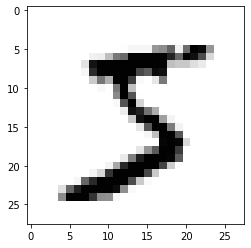

In [34]:
# 再开个格子, 除了第一个数据之外的数据格式化为28*28的矩阵
image_a=numpy.asfarray(a[1:]).reshape((28,28))
plt.imshow(image_a, cmap='Greys',interpolation='None')
# 这一句话, 就是把这个数组画出来, 按照28*28个像素画出来

In [37]:
nn(28*28, 100, 10, 0.3)
# 训练所有数据
for re in dlist:
    a=re.split(',') # 把字符串用逗号拆成数组
    # 这里是把颜色的数字压缩到0-1之间, 颜色数值一般是0-255, 如果不缩数字持续乘法会导致过大, 大到超过计算机能处理的极限
    ia=(numpy.asfarray(a[1:])/255.0*0.99+0.01)
    # 制造训练的target数据
    targetv=numpy.zeros(nn.outputnode) +0.01 # 整体都初始化为0.01
    # 因为第一个数字是这一行数据的数字, 所以用这个数字做target是非常合理的
    targetv[int(a[0])]=0.99 # 只有目标的值是0.99, 其他值应该都是0.01
    # 开始训练
    nn.train(ia, targetv)
# 好了, 可以测试运行一下, 看看是否有啥拼写错误

7


array([[0.13007255],
       [0.01686659],
       [0.02346492],
       [0.05972249],
       [0.08761667],
       [0.01828404],
       [0.00374281],
       [0.89012156],
       [0.07616081],
       [0.0150902 ]])

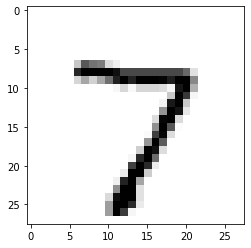

In [38]:
#----------验证结果-----------
dfile=open("./mnist_test_10.csv",'r')
dlist=dfile.readlines()
dfile.close()
import matplotlib.pyplot
a=dlist[0].split(',')# 这里dlist[0]代表第一条, 可以换换其他数字试试
print(a[0]) # 看一下这个数组的第一个元素, 这个元素是这个数组实际的数字值
image_a=numpy.asfarray(a[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_a, cmap='Greys',interpolation='None')
# 测试一下这一条数据
ia=(numpy.asfarray(a[1:])/255.0*0.99+0.01)
nn.query(ia) 